#**LOAD DATA**

In [3]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/insurance.csv")

# Step 3: Display the first few rows
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


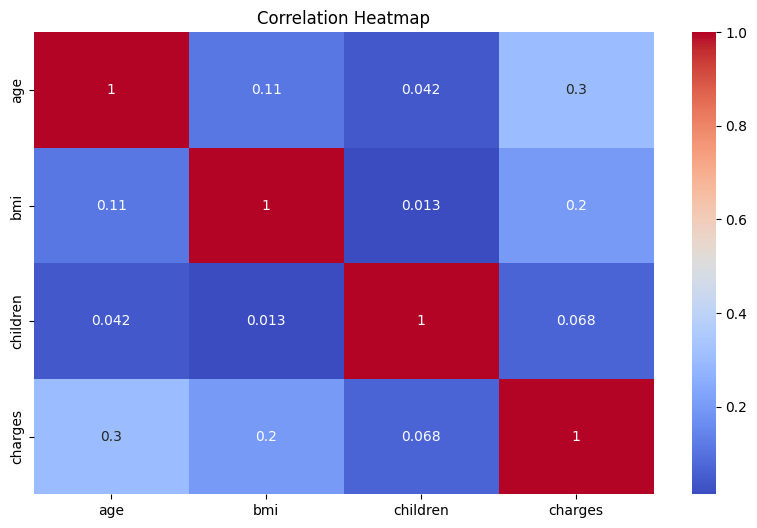

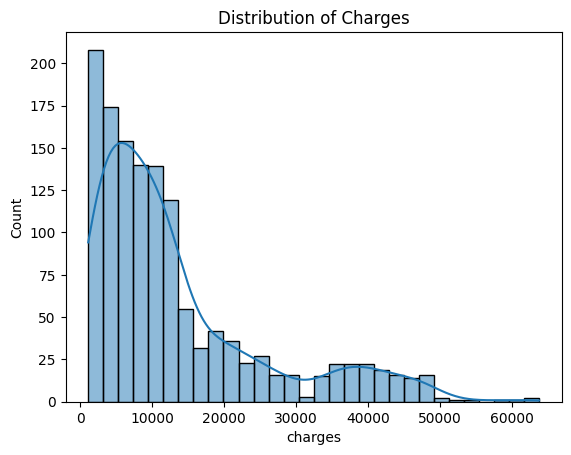

In [4]:
# Basic info
df.info()

# Summary statistics
df.describe()

# Check for null values
df.isnull().sum()

# Data types
df.dtypes

# Check for unique values
df.nunique()

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of target variable (e.g., charges)
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()


In [5]:
df_copy = df.copy()

In [7]:
n = df_copy.isnull().sum()
print(n)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


#OUTLIER DETECTION

<Axes: ylabel='age'>

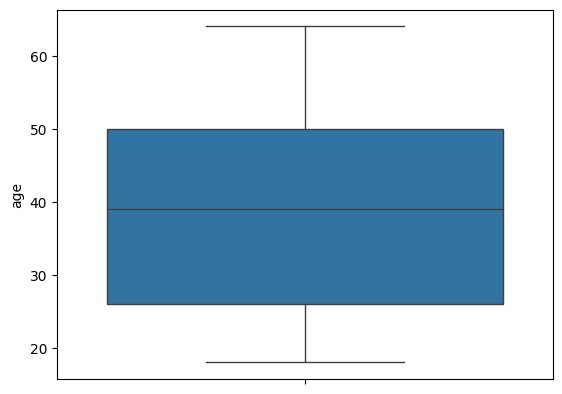

In [28]:
#age=n , sex=n ,bmi=y ,children=n ,smoker=y ,region=n ,charges=y
#do encoding for smoker
sns.boxplot(df_copy["age"])




<Axes: ylabel='sex'>

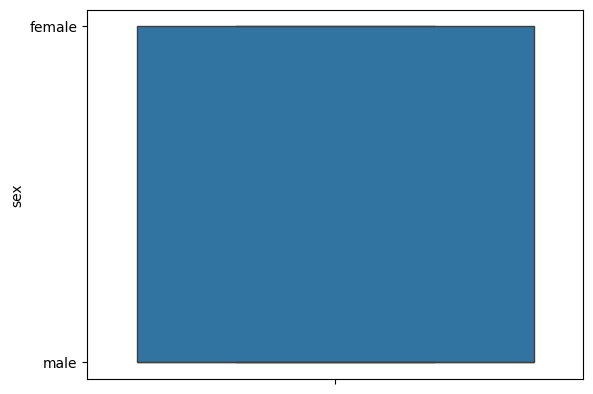

In [11]:
sns.boxplot(df_copy["sex"])


<Axes: ylabel='bmi'>

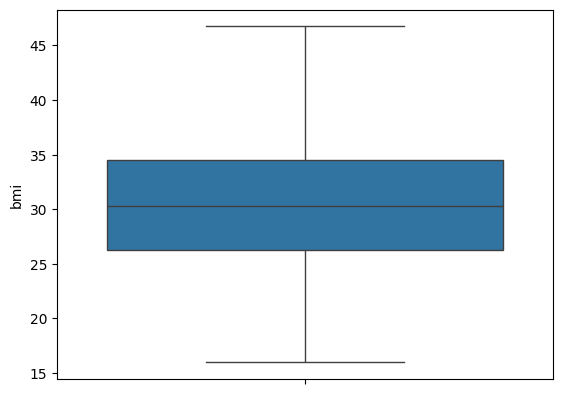

In [23]:
sns.boxplot(df_copy["bmi"])


<Axes: ylabel='children'>

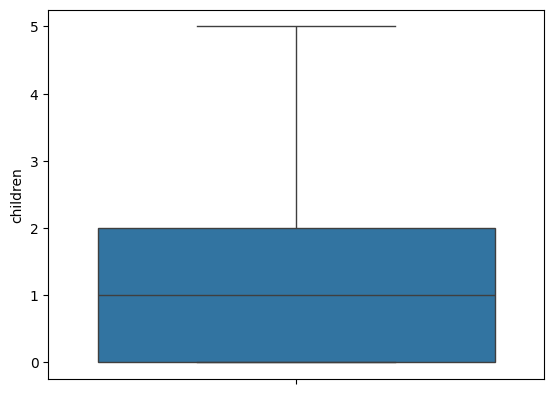

In [13]:
sns.boxplot(df_copy["children"])


<Axes: ylabel='smoker'>

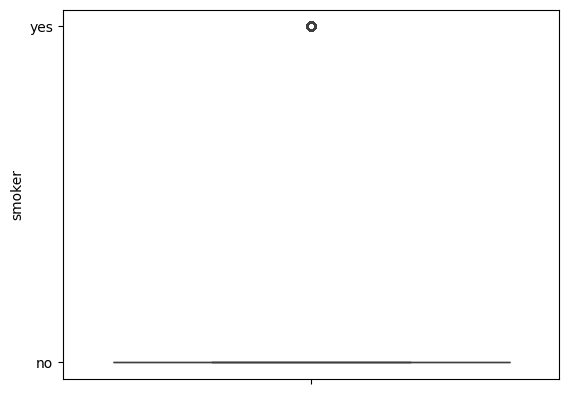

In [14]:
sns.boxplot(df_copy["smoker"])


<Axes: ylabel='region'>

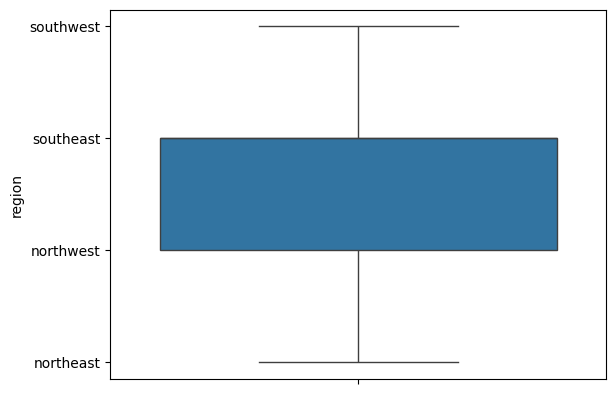

In [15]:
sns.boxplot(df_copy["region"])


<Axes: ylabel='charges'>

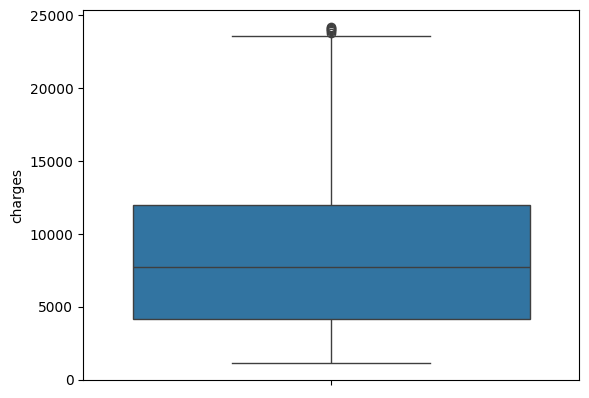

In [32]:
sns.boxplot(df_copy["charges"])

#Removing Outliers

In [27]:
# Calculate IQR for a specific column (e.g., 'bmi')
Q1 = df_copy['bmi'].quantile(0.25)
Q3 = df_copy['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_copy = df_copy[(df_copy["bmi"]<=upper_bound) & (df_copy["bmi"]>=lower_bound) ]

In [29]:
# Calculate IQR for a specific column (e.g., 'charges')
Q1 = df_copy['charges'].quantile(0.25)
Q3 = df_copy['charges'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_copy = df_copy[(df_copy["charges"]<=upper_bound) & (df_copy["charges"]>=lower_bound) ]

#**UNDERSTANDING RELATIONSHIPS**

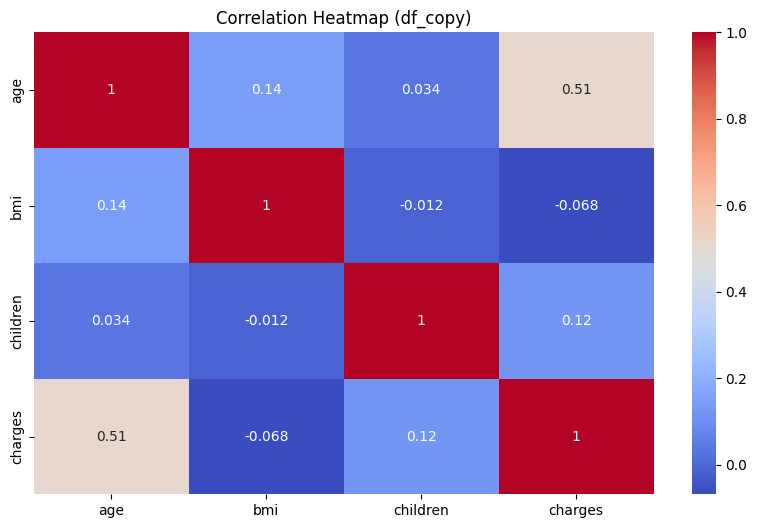

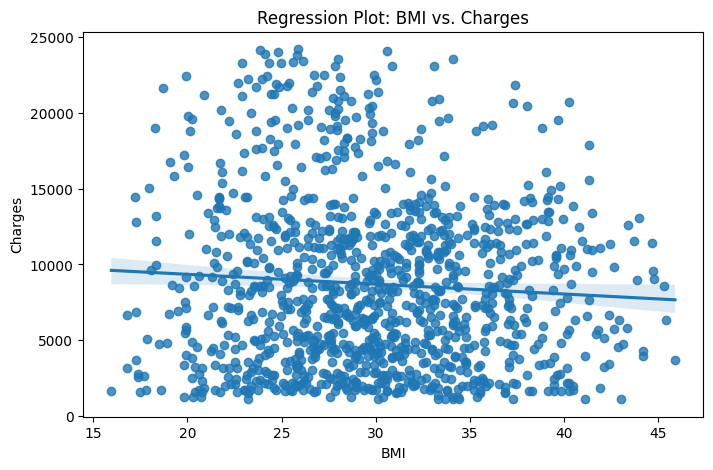

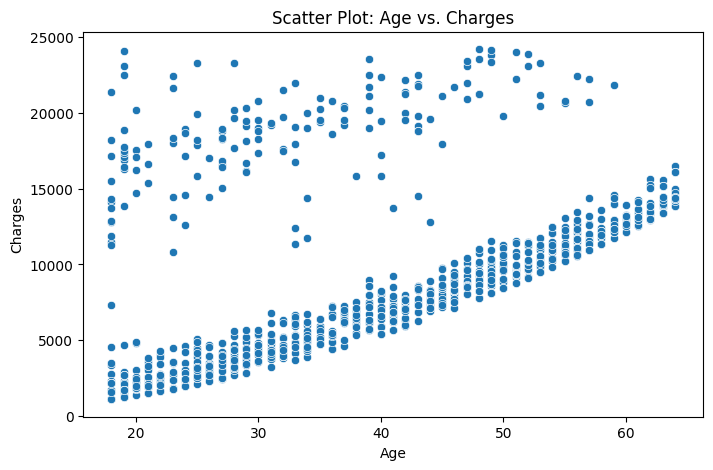

In [34]:
## Calculate and Display Correlation Matrix for df_copy

# Calculate the correlation matrix, considering only numerical columns
correlation_matrix_copy = df_copy.corr(numeric_only=True)

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_copy, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (df_copy)')
plt.show()

# Create a regression plot for 'bmi' and 'charges'
plt.figure(figsize=(8, 5))
sns.regplot(x='bmi', y='charges', data=df_copy)
plt.title('Regression Plot: BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# Create a scatter plot for 'age' and 'charges'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='charges', data=df_copy)
plt.title('Scatter Plot: Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


#**ENGNEERING NEW FEATURES**

In [ ]:
# Feature scaling 'charges' using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_copy['charges_scaled'] = scaler.fit_transform(df_copy[['charges']])

# Display the DataFrame with the new scaled column
df_copy.drop("age_scaled", axis=1, inplace=True)
print(df_copy.head())

#ENCODING